# Euclid Galaxy Clusters Tutorial

This notebook demonstrates how to query and visualize Euclid Q1 MER mosaic data for galaxy clusters.

## Table of Contents
1. [Loading the Cluster Catalog](#loading-the-cluster-catalog)
2. [Random Cluster Selection](#random-cluster-selection)
3. [IRSA Data Querying](#irsa-data-querying)
4. [Multi-band Image Visualization](#multi-band-image-visualization)


## 1. Loading the Cluster Catalog

Let's start by importing the necessary libraries and loading our Euclid Q1 cluster catalog.


In [1]:
# Install required packages if needed
#!pip install astroquery fsspec requests aiohttp scikit-learn

# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroquery.ipac.irsa import Irsa

from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord
from astropy import units as u
import fsspec
import time

from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load the Euclid Q1 cluster catalog
df = pd.read_csv('euclid_q1_clusters.csv')

print(f"Dataset shape: {df.shape}")
df

Dataset shape: (35, 13)


NAME             ID   RAPZWav  DecPZWav  \
0   EUCL-Q1-CL J041113.88−481928.2   EUCL-Q1-CL-0   62.8089  -48.3245   
1   EUCL-Q1-CL J041724.90−474849.7   EUCL-Q1-CL-1   64.3521  -47.8150   
2   EUCL-Q1-CL J033747.63−275112.8   EUCL-Q1-CL-2   54.4491  -27.8497   
3   EUCL-Q1-CL J032321.22−275105.3   EUCL-Q1-CL-3   50.8371  -27.8549   
4   EUCL-Q1-CL J040151.05−502848.7   EUCL-Q1-CL-4   60.4686  -50.4780   
5   EUCL-Q1-CL J040558.72−491549.3   EUCL-Q1-CL-5   61.5018  -49.2626   
6   EUCL-Q1-CL J040655.77−480504.2   EUCL-Q1-CL-6   61.7282  -48.0850   
7   EUCL-Q1-CL J041343.51−480756.5   EUCL-Q1-CL-7   63.4322  -48.1305   
8   EUCL-Q1-CL J180607.67+635615.6   EUCL-Q1-CL-8  271.5285   63.9386   
9   EUCL-Q1-CL J040509.84−464902.4   EUCL-Q1-CL-9   61.2955  -46.8097   
10  EUCL-Q1-CL J035146.84−480404.3  EUCL-Q1-CL-10   57.9409  -48.0683   
11  EUCL-Q1-CL J034959.80−481952.6  EUCL-Q1-CL-11   57.5029  -48.3288   
12  EUCL-Q1-CL J035003.59−504145.7  EUCL-Q1-CL-12   57.5123  -50.6948   
13  EUCL-Q1-CL J033352.73−272113.8  EUCL-Q1-CL-13   53.4665  -27.3535   
14  EUCL-Q1-CL J032929.78−281930.3  EUCL-Q1-CL-14   52.3730  -28.3266   
15  EUCL-Q1-CL J033412.98−282418.7  EUCL-Q1-CL-15   53.5511  -28.4065   
16  EUCL-Q1-CL J033355.96−283807.7  EUCL-Q1-CL-16   53.4879  -28.6368   
17  EUCL-Q1-CL J040440.54−472444.6  EUCL-Q1-CL-17   61.1691  -47.4098   
18  EUCL-Q1-CL J033619.94−263512.9  EUCL-Q1-CL-18   54.0817  -26.5831   
19  EUCL-Q1-CL J033635.31−292553.3  EUCL-Q1-CL-19   54.1464  -29.4327   
20  EUCL-Q1-CL J041838.86−455252.9  EUCL-Q1-CL-20   64.6645  -45.8807   
21  EUCL-Q1-CL J033851.49−284807.8  EUCL-Q1-CL-21   54.7174  -28.7999   
22  EUCL-Q1-CL J042117.89−484550.8  EUCL-Q1-CL-22   65.3239  -48.7647   
23  EUCL-Q1-CL J033526.63−291824.9  EUCL-Q1-CL-23   53.8620  -29.3015   
24  EUCL-Q1-CL J175712.26+680259.0  EUCL-Q1-CL-24  269.3108   68.0460   
25  EUCL-Q1-CL J033538.84−270305.5  EUCL-Q1-CL-25   53.9143  -27.0511   
26  EUCL-Q1-CL J041109.36−490953.7  EUCL-Q1-CL-26   62.7910  -49.1650   
27  EUCL-Q1-CL J034251.87−491114.0  EUCL-Q1-CL-27   55.7173  -49.1902   
28  EUCL-Q1-CL J040406.81−481302.2  EUCL-Q1-CL-28   61.0243  -48.2198   
29  EUCL-Q1-CL J033055.76−294746.3  EUCL-Q1-CL-29   52.7296  -29.7977   
30  EUCL-Q1-CL J034001.03−284959.7  EUCL-Q1-CL-30   55.0111  -28.8358   
31  EUCL-Q1-CL J041839.71−483832.0  EUCL-Q1-CL-31   64.6662  -48.6298   
32  EUCL-Q1-CL J174731.98+663438.5  EUCL-Q1-CL-32  266.8740   66.5803   
33  EUCL-Q1-CL J181458.48+645725.1  EUCL-Q1-CL-33  273.7412   64.9563   
34  EUCL-Q1-CL J040332.81−482819.1  EUCL-Q1-CL-34   60.8779  -48.4695   

     RAAMICO  DecAMICO  zPZWav  zAMICO        zspec Nzspec  SNRPZWav  \
0    62.8067  -48.3245    0.41    0.40            -      -     40.81   
1    64.3554  -47.8127    0.55    0.56            -      -     24.20   
2    54.4478  -27.8574    0.49    0.48  0.535±0.004     10     23.43   
3    50.8397  -27.8481    0.42    0.41            -      -     22.61   
4    60.4568  -50.4824    0.43    0.42            -      -     22.38   
5    61.4875  -49.2648    0.31    0.30            -      -     22.21   
6    61.7365  -48.0840    0.69    0.70            -      -     22.14   
7    63.4304  -48.1343    1.47    1.46            -      -     21.74   
8   271.5355   63.9367    1.32    1.33            -      -     21.53   
9    61.2865  -46.8250    0.42    0.38            -      -     20.48   
10   57.9494  -48.0674    0.56    0.56            -      -     20.22   
11   57.4954  -48.3338    1.40    1.44            -      -     20.14   
12   57.5176  -50.6973    0.65    0.66            -      -     20.10   
13   53.4728  -27.3542    0.57    0.55  0.605±0.005      8     19.98   
14   52.3752  -28.3236    0.63    0.66  0.682±0.007     37     19.74   
15   53.5570  -28.4039    0.65    0.66  0.662±0.007     74     18.84   
16   53.4785  -28.6342    0.59    0.56  0.665±0.007     38     18.70   
17   61.1687  -47.4150    0.88    0.89            -      -     18.62   
18   54.0844  -26.5907    0.50   

## 2. Random Cluster and Control Field Selection

Let's randomly select one cluster from our catalog and also select a random control field that avoids the 15 arcmin vicinity of all clusters.


In [3]:
# Set random seed for reproducibility
np.random.seed(42)
# Randomly select one cluster
cluster = df.sample(n=1).iloc[0]

cluster

NAME          EUCL-Q1-CL J041109.36−490953.7
ID                             EUCL-Q1-CL-26
RAPZWav                               62.791
DecPZWav                             -49.165
RAAMICO                               62.787
DecAMICO                            -49.1649
zPZWav                                  0.42
zAMICO                                  0.35
zspec                                      -
Nzspec                                     -
SNRPZWav                               16.42
SNRAMICO                               31.19
lambdaPmem                        31.01±5.12
Name: 26, dtype: object

In [4]:
# Function to find a random control field that avoids all cluster locations
def find_control_field_corrected(cluster_df, cluster_ra, cluster_dec, min_distance_arcmin=15, max_attempts=100):
    """
    Find a random control field that is at least min_distance_arcmin away from all clusters.
    Uses existing cluster locations as anchors and adds random offsets.
    """
    
    for attempt in range(max_attempts):
        # Randomly select another cluster as an anchor point
        anchor_cluster = cluster_df.sample(n=1).iloc[0]
        anchor_ra, anchor_dec = anchor_cluster['RAPZWav'], anchor_cluster['DecPZWav']
        
        # Add random offset of ~30 arcmin (0.5 degrees) in random direction
        offset_arcmin = np.random.uniform(25, 35)  # 25-35 arcmin offset
        offset_deg = offset_arcmin / 60.0
        
        # Random direction (0 to 2π radians)
        direction = np.random.uniform(0, 2 * np.pi)
        
        # Calculate offset in RA and Dec
        # Note: RA offset needs to be adjusted for declination
        ra_offset = offset_deg * np.cos(direction) / np.cos(np.radians(anchor_dec))
        dec_offset = offset_deg * np.sin(direction)
        
        # Calculate potential control field coordinates
        control_ra = anchor_ra + ra_offset
        control_dec = anchor_dec + dec_offset
        
        # Check distance to all clusters using proper spherical geometry
        control_coord = SkyCoord(ra=control_ra, dec=control_dec, unit='deg')
        cluster_coords = SkyCoord(ra=cluster_df['RAPZWav'], dec=cluster_df['DecPZWav'], unit='deg')
        
        # Calculate angular separations in arcminutes
        distances_arcmin = control_coord.separation(cluster_coords).to(u.arcmin).value
        
        # If all distances are greater than minimum, we found a good control field
        if np.all(distances_arcmin > min_distance_arcmin):
            return control_ra, control_dec
    
    # If we couldn't find a good control field, use a fallback
    print(f"Warning: Could not find control field after {max_attempts} attempts. Using fallback.")
    # Use a location that's at least min_distance_arcmin from the selected cluster
    fallback_offset = (min_distance_arcmin + 10) / 60.0  # Add 10 arcmin buffer
    fallback_ra = cluster_ra + fallback_offset
    fallback_dec = cluster_dec + fallback_offset
    
    return fallback_ra, fallback_dec

# Use the corrected function
control_ra, control_dec = find_control_field_corrected(df, cluster['RAPZWav'], cluster['DecPZWav'])


print(f"Control field coordinates: RA={control_ra:.6f}, Dec={control_dec:.6f}")

# Calculate distance between cluster and control field using proper spherical geometry
cluster_coord = SkyCoord(ra=cluster['RAPZWav'], dec=cluster['DecPZWav'], unit='deg')
control_coord = SkyCoord(ra=control_ra, dec=control_dec, unit='deg')
distance_arcmin = cluster_coord.separation(control_coord).to(u.arcmin).value
print(f"Distance between cluster and control field: {distance_arcmin:.1f} arcminutes")


Control field coordinates: RA=53.654485, Dec=-28.977569
Distance between cluster and control field: 1281.6 arcminutes


## 3. IRSA Data Querying and Caching

Query and cache Euclid Q1 MER mosaics from IRSA for both the selected cluster and control field with 15 arcmin cutouts.


In [5]:
# Create SkyCoord objects and define parameters
search_radius = 2.0  # arcminutes
im_cutout = 15.0 * u.arcmin  # 15 arcminutes for both cluster and control fields

print(f"Creating {im_cutout.value} arcmin cutouts for both fields")

# Query Euclid Q1 MER mosaics for cluster field
print("Querying cluster field...")
cluster_mer_images = Irsa.query_sia(pos=(cluster_coord, search_radius * u.arcmin), collection='euclid_DpdMerBksMosaic')

# Filter for Euclid facility and science dataproduct_subtype
cluster_mer_images = cluster_mer_images[(cluster_mer_images['facility_name'] == 'Euclid') & (cluster_mer_images['dataproduct_subtype'] == 'science')]

# Query Euclid Q1 MER mosaics for control field
print("Querying control field...")
control_mer_images = Irsa.query_sia(pos=(control_coord, search_radius * u.arcmin), collection='euclid_DpdMerBksMosaic')

# Filter for Euclid facility and science dataproduct_subtype
control_mer_images = control_mer_images[(control_mer_images['facility_name'] == 'Euclid') & (control_mer_images['dataproduct_subtype'] == 'science')]

print(f"Found {len(cluster_mer_images)} images for cluster field")
print(f"Found {len(control_mer_images)} images for control field")

cluster_mer_images

Creating 15.0 arcmin cutouts for both fields
Querying cluster field...
Querying control field...
Found 4 images for cluster field
Found 4 images for control field


<Table length=4>
       s_ra             s_dec        facility_name ... o_ucd  upload_row_id
       deg               deg                       ...                     
     float64           float64           object    ... object     int64    
----------------- ------------------ ------------- ... ------ -------------
62.63341442956414 -48.99998611110919        Euclid ...                    1
62.63341442956414 -48.99998611110919        Euclid ...                    1
62.63341442956414 -48.99998611110919        Euclid ...                    1
62.63341442956414 -48.99998611110919        Euclid ...                    1

In [6]:
# Create cache directory
cache_dir = 'euclid_cache'
os.makedirs(cache_dir, exist_ok=True)

# Function to download and cache images for a field
def download_and_cache_field(mer_images, field_name, field_coord, field_id):
    """Download and cache images for a field (cluster or control)"""
    print(f"\nProcessing {field_name} field...")
    
    # Get URLs for each band
    vis_url = mer_images[mer_images['energy_bandpassname'] == 'VIS'][0]['access_url']
    y_url = mer_images[mer_images['energy_bandpassname'] == 'Y'][0]['access_url']
    j_url = mer_images[mer_images['energy_bandpassname'] == 'J'][0]['access_url']
    h_url = mer_images[mer_images['energy_bandpassname'] == 'H'][0]['access_url']
    
    # Download and cache images
    cached_files = {}
    for band, url in [('VIS', vis_url), ('Y', y_url), ('J', j_url), ('H', h_url)]:
        cache_file = os.path.join(cache_dir, f'{band}_{field_id}.fits')
        if not os.path.exists(cache_file):
            print(f"  Downloading {band} band...")
            temp_file = download_file(url)
            import shutil
            shutil.move(temp_file, cache_file)
            cached_files[band] = cache_file
        else:
            print(f"  Using cached {band} band")
            cached_files[band] = cache_file
    
    # Create cutouts and store WCS
    cutouts = {}
    cutout_wcs = None
    for band in ['VIS', 'Y', 'J', 'H']:
        hdu = fits.open(cached_files[band])
        cutout = Cutout2D(hdu[0].data, position=field_coord, size=im_cutout, wcs=WCS(hdu[0].header))
        cutouts[band] = cutout.data
        if band == 'VIS':  # Store WCS from VIS band
            cutout_wcs = cutout.wcs
        hdu.close()
    
    return cutouts, cutout_wcs

# Download and cache both fields
cluster_cutouts, cluster_cutout_wcs = download_and_cache_field(
    cluster_mer_images, "cluster", cluster_coord, cluster["ID"]
)

control_cutouts, control_cutout_wcs = download_and_cache_field(
    control_mer_images, "control", control_coord, f"CONTROL_{cluster['ID']}"
)

print(f"\nBoth fields processed successfully!")
print(f"Cluster field cutout size: {cluster_cutouts['VIS'].shape}")
print(f"Control field cutout size: {control_cutouts['VIS'].shape}")



Processing cluster field...
  Using cached VIS band
  Using cached Y band
  Using cached J band
  Using cached H band

Processing control field...
  Using cached VIS band
  Using cached Y band
  Using cached J band
  Using cached H band

Both fields processed successfully!
Cluster field cutout size: (8156, 9000)
Control field cutout size: (9000, 8635)


## 4. Multi-band Image Visualization

Create and display VIS, Y, J, H bands plus RGB composite for both cluster and control fields.


Processing complete! Time: 5.2 seconds, be patiend with imshow ...


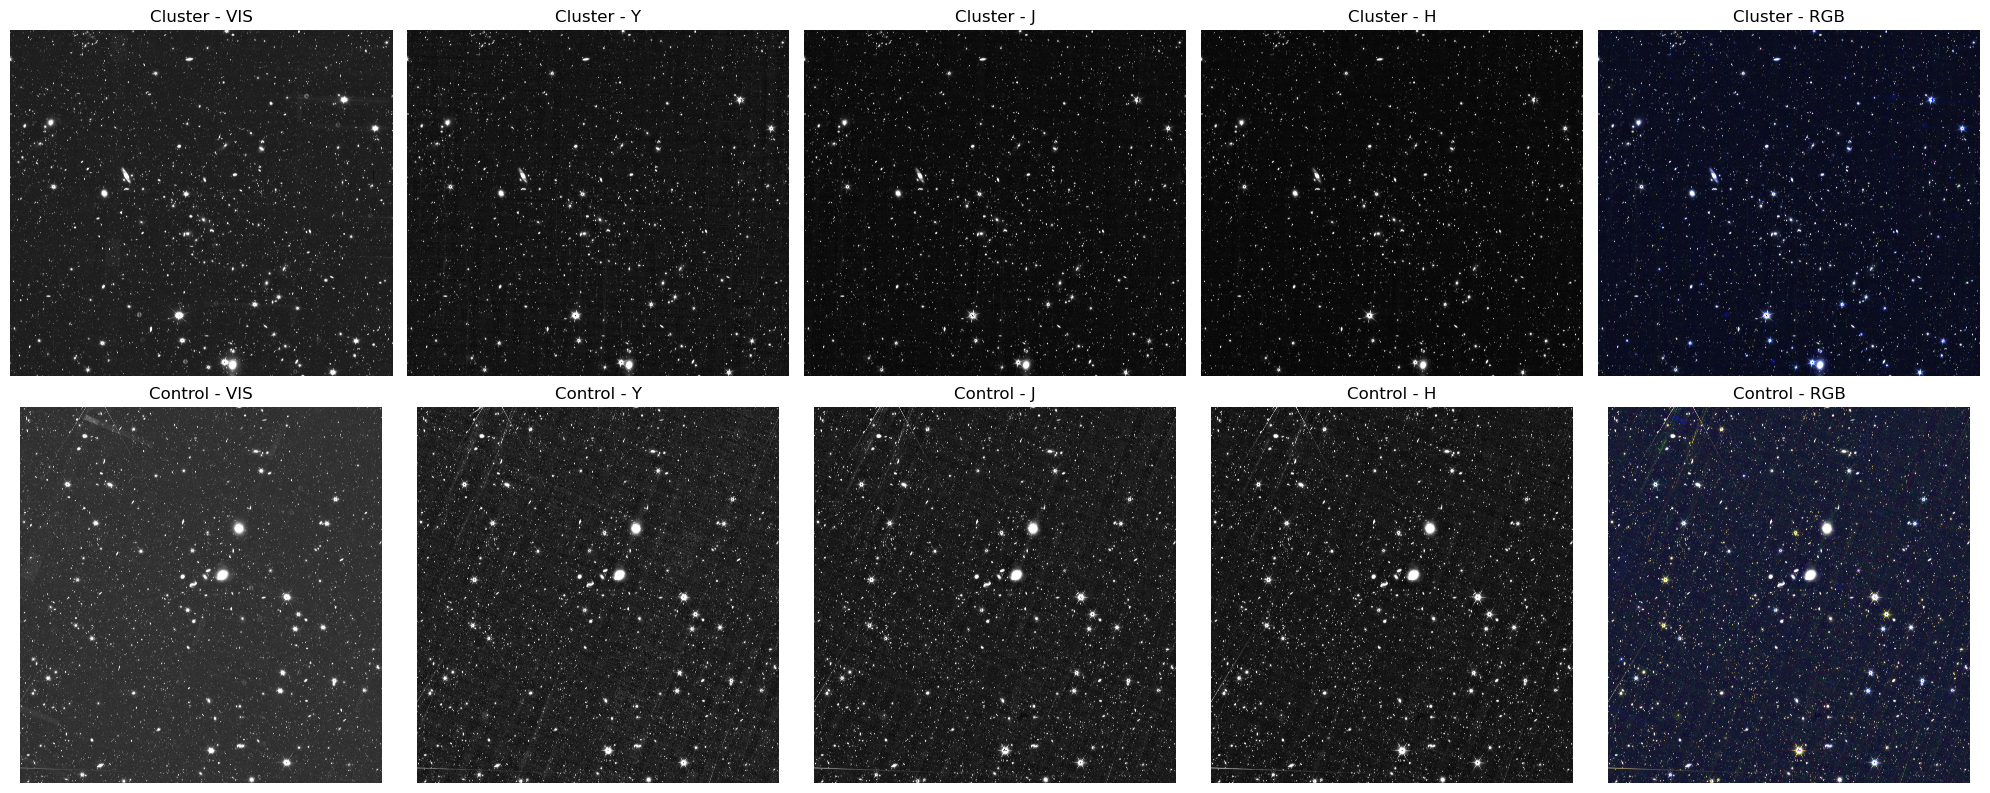

In [7]:
# Optimized normalization using fixed 100x100 pixel sample
def remove_outliers_and_normalize(data, lower_percentile=5, upper_percentile=99):
    """
    Fast normalization using a fixed 100x100 pixel sample for percentile calculation.
    """
    # Use a fixed 100x100 pixel sample from the center of the image
    h, w = data.shape
    center_h, center_w = h // 2, w // 2
    sample_data = data[center_h-100:center_h+100, center_w-100:center_w+100]
    
    # Calculate percentiles on the sample (much faster)
    vmin = np.percentile(sample_data, lower_percentile)
    vmax = np.percentile(sample_data, upper_percentile)
    
    # Vectorized normalization
    data_norm = np.clip((data - vmin) / (vmax - vmin), 0, 1)
    return data_norm

# Function to create normalized cutouts and RGB for a field
def process_field_cutouts(cutouts, field_name):
    """Process cutouts for a field and create RGB composite"""
    norm_cutouts = {}
    for band in ['VIS', 'Y', 'J', 'H']:
        norm_cutouts[band] = remove_outliers_and_normalize(cutouts[band])
    
    # Create RGB (R=H, G=J, B=VIS)
    rgb = np.dstack([norm_cutouts['H'], norm_cutouts['J'], norm_cutouts['VIS']])
    
    return norm_cutouts, rgb

# Process both fields with optimized functions
start_time = time.time()

cluster_norm_cutouts, cluster_rgb = process_field_cutouts(cluster_cutouts, "cluster")
control_norm_cutouts, control_rgb = process_field_cutouts(control_cutouts, "control")

processing_time = time.time() - start_time
print(f"Processing complete! Time: {processing_time:.1f} seconds, be patiend with imshow ...")

# Plot both fields side by side
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
bands = ['VIS', 'Y', 'J', 'H']
titles = ['VIS', 'Y', 'J', 'H', 'RGB']

# Cluster field (top row)
for i, (band, title) in enumerate(zip(bands, titles)):
    axes[0, i].imshow(cluster_norm_cutouts[band], cmap='gray', origin='lower')
    axes[0, i].set_title(f'Cluster - {title}')
    axes[0, i].axis('off')

axes[0, 4].imshow(cluster_rgb, origin='lower')
axes[0, 4].set_title('Cluster - RGB')
axes[0, 4].axis('off')

# Control field (bottom row)
for i, (band, title) in enumerate(zip(bands, titles)):
    axes[1, i].imshow(control_norm_cutouts[band], cmap='gray', origin='lower')
    axes[1, i].set_title(f'Control - {title}')
    axes[1, i].axis('off')

axes[1, 4].imshow(control_rgb, origin='lower')
axes[1, 4].set_title('Control - RGB')
axes[1, 4].axis('off')

plt.tight_layout()
plt.show()


In [8]:
# Query galaxies in both fields with BOX search
table_mer = 'euclid_q1_mer_catalogue'
table_phz = 'euclid_q1_phz_photo_z'

# Convert cutout size to degrees
cutout_deg = im_cutout.to(u.deg).value

# Function to query galaxies for a field
def query_galaxies_for_field(ra, dec, field_name, redshift_center, redshift_width=0.1):
    """Query galaxies for a specific field with redshift slice"""
    print(f"\nQuerying galaxies for {field_name} field...")
    
    adql = (f"SELECT DISTINCT mer.object_id, mer.ra, mer.dec, "
            f"phz.flux_vis_unif, phz.flux_y_unif, phz.flux_j_unif, phz.flux_h_unif, "
            f"phz.phz_classification, phz.phz_median, phz.phz_90_int1, phz.phz_90_int2 "
            f"FROM {table_mer} AS mer "
            f"JOIN {table_phz} as phz "
            f"ON mer.object_id = phz.object_id "
            f"WHERE 1 = CONTAINS(POINT('ICRS', mer.ra, mer.dec), "
            f"BOX('ICRS', {ra}, {dec}, {cutout_deg/np.cos(np.radians(dec))}, {cutout_deg})) "
            f"AND phz.flux_vis_unif > 0 "
            f"AND phz.flux_y_unif > 0 "
            f"AND phz.flux_j_unif > 0 "
            f"AND phz.flux_h_unif > 0 "
            f"AND phz.phz_classification = 2 "
            f"AND ((phz.phz_90_int2 - phz.phz_90_int1) / (1 + phz.phz_median)) < 0.20 "
            f"AND phz.phz_median BETWEEN {redshift_center-redshift_width} AND {redshift_center+redshift_width}")
    
    result = Irsa.query_tap(adql).to_table()
    print(f"Found {len(result)} galaxies in {field_name} field (z = {redshift_center:.2f} ± {redshift_width:.2f})")
    
    return result

# Query galaxies for both fields in the cluster redshift slice
cluster_galaxies = query_galaxies_for_field(
    cluster['RAPZWav'], cluster['DecPZWav'], "cluster", 
    cluster['zPZWav'], redshift_width=0.1
)

control_galaxies = query_galaxies_for_field(
    control_ra, control_dec, "control", 
    cluster['zPZWav'], redshift_width=0.1
)

# Convert to pandas DataFrames for easier analysis
cluster_df_galaxies = cluster_galaxies.to_pandas()
control_df_galaxies = control_galaxies.to_pandas()

print(f"\nGalaxy counts summary:")
print(f"Cluster field: {len(cluster_galaxies)} galaxies")
print(f"Control field: {len(control_galaxies)} galaxies")
print(f"Ratio (cluster/control): {len(cluster_galaxies)/len(control_galaxies):.2f}")

cluster_df_galaxies.head()



Querying galaxies for cluster field...
Found 563 galaxies in cluster field (z = 0.42 ± 0.10)

Querying galaxies for control field...
Found 265 galaxies in control field (z = 0.42 ± 0.10)

Galaxy counts summary:
Cluster field: 563 galaxies
Control field: 265 galaxies
Ratio (cluster/control): 2.12


object_id         ra        dec  flux_vis_unif  flux_y_unif  \
0 -629764852492491656  62.976485 -49.249166       3.367484     4.984755   
1 -628517081491357092  62.851708 -49.135709       4.814821     6.842182   
2 -628191285491294716  62.819129 -49.129472      48.538904   116.486160   
3 -626912364492092231  62.691236 -49.209223      49.681714   117.557351   
4 -629491054492224871  62.949105 -49.222487      17.649556    46.516597   

   flux_j_unif  flux_h_unif  phz_classification  phz_median  phz_90_int1  \
0     6.112927     5.281266                   2        0.39         0.31   
1     7.893352     8.727212                   2        0.40         0.33   
2   159.573906   200.855573                   2        0.37         0.31   
3   160.781194   196.224042                   2        0.34         0.25   
4    63.370602    80.952158                   2        0.47         0.38   

   phz_90_int2  
0         0.50  
1         0.50  
2         0.44  
3         0.38  
4         0.51

## 5. Cluster Finding Algorithm

Apply DBSCAN clustering algorithm to identify clusters in both the cluster field and control field, a check both to confirm the cluster is there at that redshift and to identify some of the members ...

In [ ]:
# Function to apply DBSCAN clustering with validity check (needed due to query/cutout mismatch)
def apply_dbscan_clustering(galaxy_df, wcs, rgb_image, field_name, eps=400, min_samples=10):
    """Apply DBSCAN clustering to galaxy coordinates from dataframe with validity check"""
    print(f"\nApplying DBSCAN clustering to {field_name} field...")
    
    # Convert galaxy coordinates to pixel coordinates
    galaxy_pixels = wcs.world_to_pixel_values(galaxy_df['ra'], galaxy_df['dec'])
    
    # Filter galaxies to only show those within the image bounds (needed due to query/cutout mismatch)
    image_height, image_width = rgb_image.shape[:2]
    valid_mask = ((galaxy_pixels[0] >= 0) & (galaxy_pixels[0] < image_width) & 
                  (galaxy_pixels[1] >= 0) & (galaxy_pixels[1] < image_height))
    
    valid_galaxy_coords = np.column_stack([galaxy_pixels[0][valid_mask], galaxy_pixels[1][valid_mask]])
    
    print(f"  Total galaxies: {len(galaxy_df)}")
    print(f"  Galaxies within image bounds: {valid_mask.sum()}")
    
    # Apply DBSCAN clustering only to valid galaxies
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(valid_galaxy_coords)
    labels = clustering.labels_
    
    # Count clusters (excluding noise points labeled as -1)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    print(f"{field_name} field: {n_clusters} clusters, {n_noise} noise points")
    
    return labels, valid_galaxy_coords, n_clusters, n_noise

# Apply clustering to both fields (with validity check)
cluster_labels, cluster_galaxy_coords, cluster_n_clusters, cluster_n_noise = apply_dbscan_clustering(
    cluster_df_galaxies, cluster_cutout_wcs, cluster_rgb, "Cluster"
)

control_labels, control_galaxy_coords, control_n_clusters, control_n_noise = apply_dbscan_clustering(
    control_df_galaxies, control_cutout_wcs, control_rgb, "Control"
)

# Compare results
print(f"\nClustering Comparison:")
print(f"Cluster field: {cluster_n_clusters} clusters, {cluster_n_noise} noise points")
print(f"Control field: {control_n_clusters} clusters, {control_n_noise} noise points")
print(f"Cluster/Control ratio: {cluster_n_clusters/max(control_n_clusters, 1):.2f}")



Applying DBSCAN clustering to Cluster field...
  Total galaxies: 563
  Galaxies within image bounds: 539
Cluster field: 7 clusters, 347 noise points

Applying DBSCAN clustering to Control field...
  Total galaxies: 265
  Galaxies within image bounds: 255
Control field: 0 clusters, 255 noise points

Clustering Comparison:
Cluster field: 7 clusters, 347 noise points
Control field: 0 clusters, 255 noise points
Cluster/Control ratio: 7.00


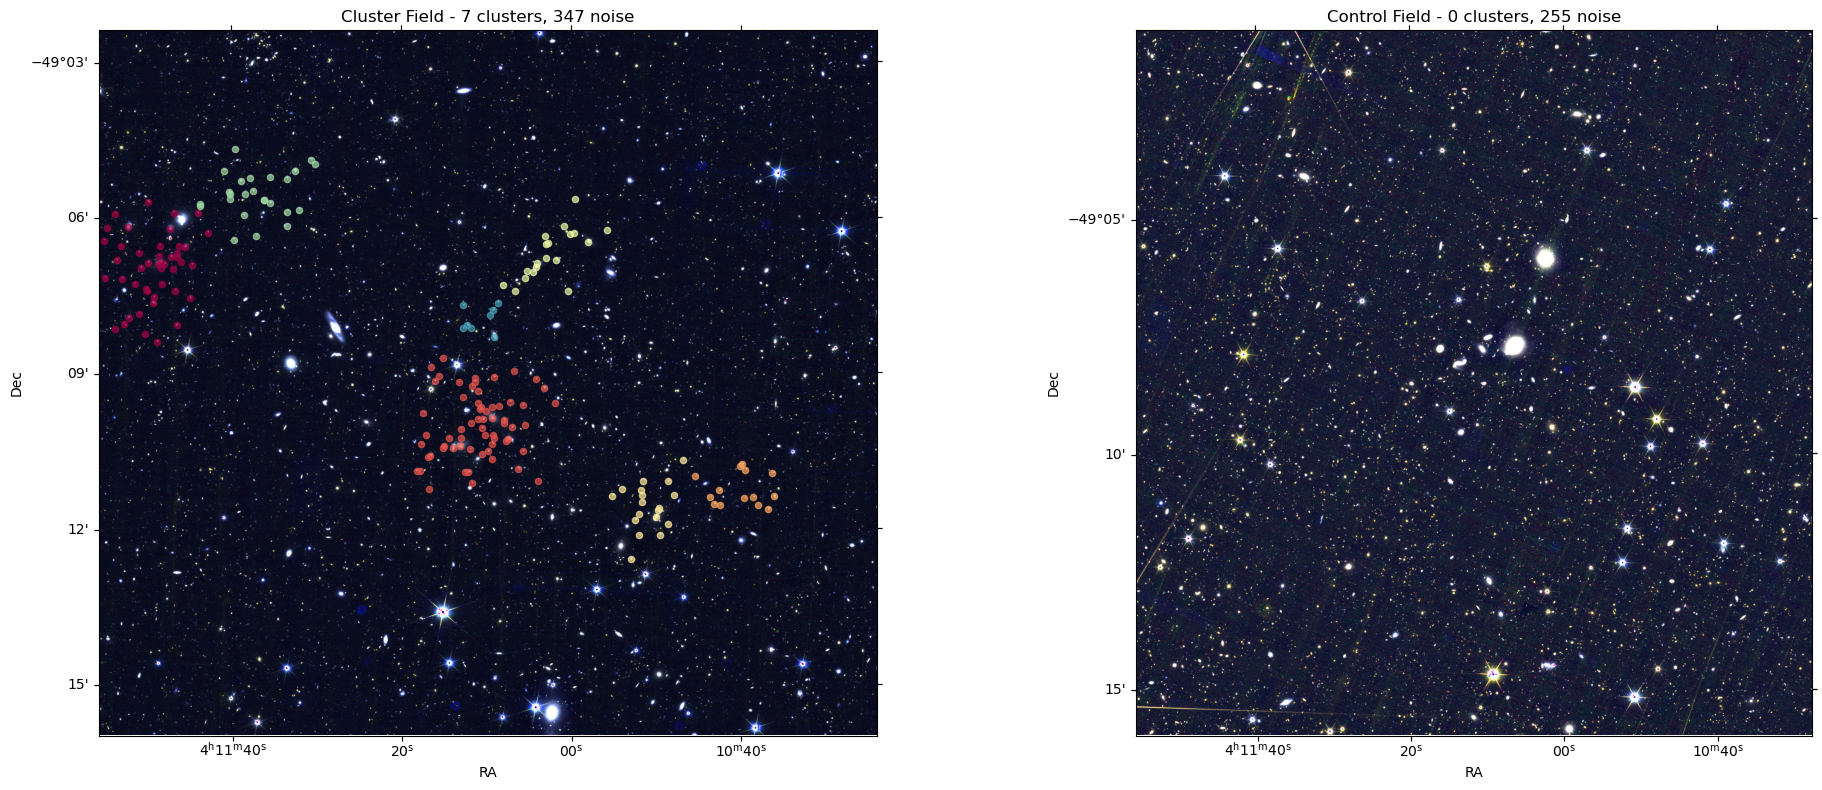

In [20]:
# Plot clustering results for both fields in one figure (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), 
                               subplot_kw={'projection': cluster_cutout_wcs})

# Cluster field (left subplot)
ax1.imshow(cluster_rgb, origin='lower')
cluster_unique_labels = set(cluster_labels)
cluster_colors = plt.cm.Spectral(np.linspace(0, 1, len(cluster_unique_labels)))

for k, col in zip(cluster_unique_labels, cluster_colors):
    if k == -1:
        col = 'black'
        marker = ''
        size = 10
        alpha = 0.3
    else:
        marker = 'o'
        size = 20
        alpha = 0.7
    
    class_member_mask = (cluster_labels == k)
    xy = cluster_galaxy_coords[class_member_mask]
    ax1.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=alpha)

ax1.set_xlabel('RA')
ax1.set_ylabel('Dec')
ax1.set_title(f'Cluster Field - {cluster_n_clusters} clusters, {cluster_n_noise} noise')

# Control field (right subplot)
ax2.imshow(control_rgb, origin='lower')
control_unique_labels = set(control_labels)
control_colors = plt.cm.Spectral(np.linspace(0, 1, len(control_unique_labels)))

for k, col in zip(control_unique_labels, control_colors):
    if k == -1:
        col = 'black'
        marker = ''
        size = 10
        alpha = 0.3
    else:
        marker = 'o'
        size = 20
        alpha = 0.7
    
    class_member_mask = (control_labels == k)
    xy = control_galaxy_coords[class_member_mask]
    ax2.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=alpha)

ax2.set_xlabel('RA')
ax2.set_ylabel('Dec')
ax2.set_title(f'Control Field - {control_n_clusters} clusters, {control_n_noise} noise')

plt.tight_layout()
plt.show()
